In [9]:
#redshift classification

#classify galaxy Redshift based on SDSS survey data 
import numpy as np

redshiftData = np.load('SDSSugriz.npy')
galaxyClass = np.load('galaxy_catalogue.npy')

In [10]:
#eyeball that the data first
def eyeBallData (data):
    N = len(data)
    firstEntry = data[0]
    firstV = data[:5]
    Nattr = len(data[0])
    nomDtype = data.dtype.names
    
    return (N, firstEntry, firstV, Nattr, nomDtype)

In [11]:
decomposeSDSS = eyeBallData(redshiftData)

print("The dataset SDSS Spectra has " + str(decomposeSDSS[0]) + " entries.\n\n" +
      "Here is the first Entry:\n" + str(decomposeSDSS[1]) + "\n\n" +
      "Here are the first 5:\n" + str(decomposeSDSS[2]) + "\n\n" +
      "Each entry has: " + str(decomposeSDSS[3]) + ' attributes. They are ' + str(decomposeSDSS[4])
     )

The dataset SDSS Spectra has 50000 entries.

Here is the first Entry:
(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301, 6.543622e-05)

Here are the first 5:
[(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05)
 (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05)
 (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05)
 (19.05989, 17.49459, 16.59285, 16.09412, 15.70741, b'GALAXY', 0.04427702, 1.062687e-05)
 (19.45567, 18.33084, 17.67185, 17.30189, 17.1365 , b'GALAXY', 0.04164413, 1.766807e-05)]

Each entry has: 8 attributes. They are ('u', 'g', 'r', 'i', 'z', 'spec_class', 'redshift', 'redshift_err')


In [24]:
decomposeGalaxyClass = eyeBallData(galaxyClass)

print("The dataset galaxyCat Data has " + str(decomposeGalaxyClass[0]) + " entries.\n\n" +
      "Here is the first Entry:\n" + str(decomposeGalaxyClass[1]) + "\n\n" +
      "Here are the first 5:\n" + str(decomposeGalaxyClass[2]) + "\n\n" +
      "Each entry has: " + str(decomposeGalaxyClass[3]) + ' attributes. They are ' + str(decomposeGalaxyClass[4])
     )

The dataset galaxyCat Data has 780 entries.

Here is the first Entry:
(1.85765, 0.67158, 0.4231, 0.3061, 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623, 5.174814, 8.263009, 11.47734, 'merger')

Here are the first 5:
[(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814,  8.263009, 11.47734 , 'merger')
 (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712,  3.416921,  3.330347, 'merger')
 (2.10697, 0.9671 , 0.5681 , 0.33747, 0.6300893, 1.992887, 2.450746, 2.473116, 2.465324, 2.438683, 3.099957, 3.623704, 3.4633  , 9.110857,  8.354343, 11.26539 , 'merger')
 (1.2284 , 0.60446, 0.39049, 0.28913, 0.6689994, 2.056115, 2.182252, 2.30951 , 2.391414, 2.472397, 3.627267, 4.063471, 3.717708, 9.580675, 12.20242 , 11.82622 , 'merger')
 (1.80792, 0.78124, 0.45528, 0.35067, 0.5001697, 2.259167,

In [25]:
N = len(redshiftData)

In [105]:
%%html

<p>One challenge arising from the SDSS AStronomical Survey is to classify QSO "Quasi Stellar Objects" from Galaxies.</p>
<p>The Object on the left is the lenticular Sombrero Galaxy, while the object on the right is a QSO.</p>

<table style="width:100%">
  <tr>
    <th><img src="galaxy.jpg",width=600,height=600></th>
    <th><img src="QSO.jpg",width=600,height=600></th> 
  </tr>
  
</table>

<p>This is a suitable problem for machine learning algorithms to tackle.</p>

,


In [80]:
ug = spectraData['u'] - spectraData['g']
gr = spectraData['g'] - spectraData['r']
ri = spectraData['r'] - spectraData['i']
iz = spectraData['i'] - spectraData['z']

#write a function that plots the spectra for you give nthe args
def plotSpectraGivenParams(filterA, filterB):
    from matplotlib import pyplot as plot
    spectraData = redshiftData[::10]
    spectraClass = spectraData['spec_class']

    qso = (spectraClass == b'QSO')
    galaxy = (spectraClass == b'GALAXY')
    
    figure = plot.figure()
    ax = figure.add_subplot(111)

    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 1.25)

    ax.plot(filterA[qso], filterB[qso], '+', ms=2, c='g', label='Quasi Stellar Object (QSO)')
    ax.plot(filterA[galaxy], filterB[galaxy], '.', ms=1.5, c='r', label='Galaxy')
    
    ax.legend(loc=2)

    ax.set_xlabel('$u-g$')
    ax.set_ylabel('$g-r$')

    plot.show()

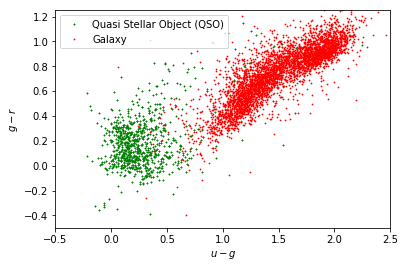

In [81]:
plotSpectraGivenParams(ug, gr)

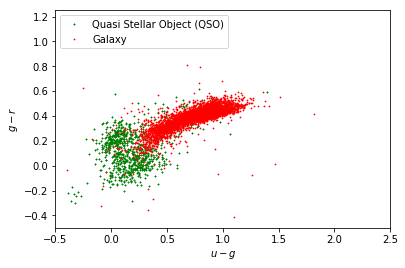

In [82]:
plotSpectraGivenParams(gr, ri)

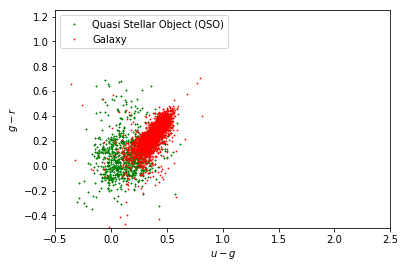

We can infer that from these spectra that comparing the firlers, ri and iz is the hardest to distinctify between Galaxies and
Quasi Stellar Objects as the wavelength 'angstroms' increases/ frequency decreases QSOs become harder to distinguish 
from galaxies


In [112]:
plotSpectraGivenParams(ri, iz)

print("We can infer that from these spectra that comparing the firlers, ri and iz is the hardest to distinctify between Galaxies" +
      " and\nQuasi Stellar Objects as the wavelength 'angstroms' increases/ frequency decreases QSOs become harder to distinguish " +
      "\nfrom galaxies")



In [84]:
#prep UGRIZ and redshift table

ugrizTable = np.zeros((N, 4)) #5,000 rows, 5 columns
ugrizTable[: ,0] = redshiftData['u'] - redshiftData['g']
ugrizTable[: ,1] = redshiftData['g'] - redshiftData['r']
ugrizTable[: ,2] = redshiftData['r'] - redshiftData['i']
ugrizTable[: ,3] = redshiftData['i'] - redshiftData['z']

classAttRedshift = np.asarray(redshiftData['redshift'])

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

def decTreeRedshiftPredict(spectra, redshift):

    split = (1/2) * N
    
    split = int(split)
    
    specTrain , redshiftTrain = spectra[:split] , redshift[:split]
    specTest , redshiftTest  = spectra[split:] , redshift[split:]
    
    modelDT = DecisionTreeRegressor() #ima use this
    modelDT.fit(specTrain, redshiftTrain)
    
    redshiftPredict = modelDT.predict(specTest)
    
    evalObj = evaluation(redshiftPredict, redshiftTest)
    
    return(evalObj)


def GNBRedshiftPredict(spectra, redshift):   
    split = (1/2) * N
    split = int(split)
    
    specTrain , redshiftTrain = spectra[:split] , redshift[:split]
    specTest , redshiftTest  = spectra[split:] , redshift[split:]
    
    modelGNB = GaussianNB() #ima use this
    
    redshiftTrain = redshiftTrain.astype('int')
    
    modelGNB.fit(specTrain, redshiftTrain)
    #modelGNB.partial_fit(specTrain, redshiftTrain, np.unique(redshiftTrain))
    redshiftPredict = modelGNB.predict(specTest)
    
    ###############################################################
    #write a function called evaluation that calculates median difference and rmse
    
    evalObj = evaluation(redshiftPredict, redshiftTest)
    
    return(evalObj)

def evaluation(predict, test):
    rmseErr = np.sqrt(np.mean(test - predict)**2) #
    medianDiff = np.median(np.abs(predict - test))
    
    return (rmseErr, medianDiff)

In [29]:
evalDT = decTreeRedshiftPredict(ugrizTable, classAttRedshift)

print("Decision tree has an RMSE = " + str(round(evalDT[0], 5)) + " regression on SDSS Galaxy Data")
print("Decision tree has an medianDiff = " + str(round(evalDT[1], 5)) + " regression on SDSS Galaxy Data")

Decision tree has an RMSE = 0.00637 regression on SDSS Galaxy Data
Decision tree has an medianDiff = 0.02181 regression on SDSS Galaxy Data


In [30]:
evalGNB = GNBRedshiftPredict(ugrizTable, classAttRedshift)

print("Gaussian Naive Bayes has an RMSE = " + str(round(evalGNB[0], 5)) + " regression on SDSS Galaxy Data")
print("Decision tree has an medianDiff = " + str(round(evalDT[1], 5)) + " regression on SDSS Galaxy Data")


Gaussian Naive Bayes has an RMSE = 0.06643 regression on SDSS Galaxy Data
Decision tree has an medianDiff = 0.02181 regression on SDSS Galaxy Data


In [31]:
#write a function that validates the model using k fold cross validation where k = 10
#10 fold cross validation is pretty genius if you think about it.
#running the model once gets us a acc reading median/rmse that can vary across configurations of datasets so its not that super
#accurate

#imagine shuffling the data and training it on 10 crossectional splits.
#The Acc reading is taken as an average of 10. Irons out the uncertainties.

from sklearn.model_selection import KFold
def cross10FoldXVal ():
    print("derp")
    #take in the model, the featues, 